In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from matplotlib import axes
from matplotlib import figure

from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#1

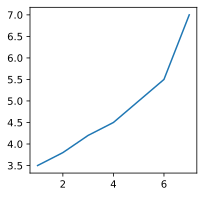

In [11]:
rcParams["figure.figsize"] = 3, 3
x = [1, 2, 3, 4, 5, 6, 7]
y = [3.5, 3.8, 4.2, 4.5, 5, 5.5, 7]
plt.plot(x, y)
plt.show()

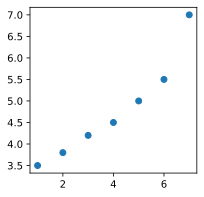

In [10]:
plt.scatter(x, y)
plt.show()

#2

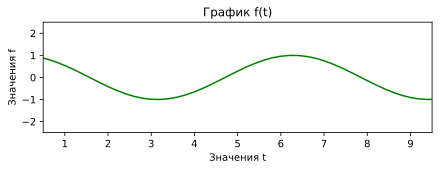

In [25]:
rcParams["figure.figsize"] = 7, 2
t = np.linspace(0, 10, 51)
f = np.cos(t)
plt.plot(t,f,color="Green")

plt.title("График f(t)")
plt.ylabel("Значения f")
plt.xlabel("Значения t")
plt.axis([0.5,9.5,-2.5,2.5])
plt.show()

#3

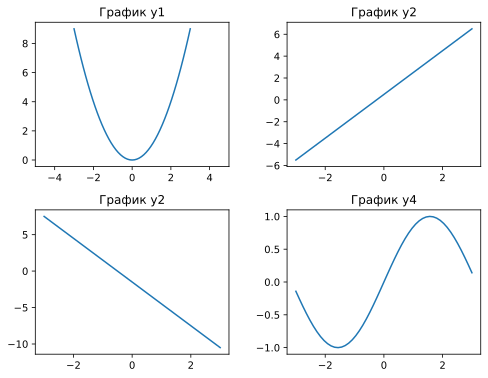

In [50]:
x = np.linspace(-3, 3, 51)
y1 = x**2
y2 = 2 * x + 0.5
y3 = -3 * x - 1.5
y4 = np.sin(x)


fig: figure.Figure
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1: axes.Axes
ax2: axes.Axes
ax3: axes.Axes
ax4: axes.Axes
ax1,ax2,ax3,ax4 = ax.flatten()

fig.set_size_inches(8, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.plot(x,y1)
ax1.set_title("График y1")
ax1.set_xlim(xmin=-5,xmax=5)
ax2.plot(x,y2)
ax2.set_title("График y2")
ax3.plot(x,y3)
ax3.set_title("График y2")
ax4.plot(x,y4)
ax4.set_title("График y4")

plt.show()


#4

In [64]:
rcParams["figure.figsize"] = 3, 3
credits = pd.read_csv("./creditcard.csv")
vc = credits.value_counts(credits.Class)
vc

Class
0    284315
1       492
dtype: int64

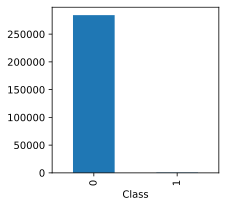

In [66]:
vc.plot(kind="bar")
plt.show()

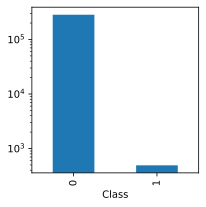

In [67]:
vc.plot(kind="bar",logy=True)
plt.show()

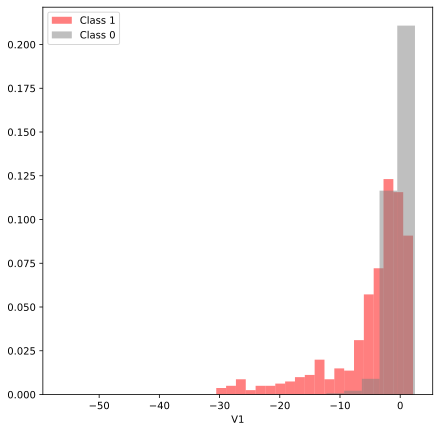

In [82]:
rcParams["figure.figsize"] = 7, 7
c1 = credits.query("Class == 1").V1
c2 = credits.query("Class == 0").V1
plt.hist(c1,density=True,bins=20,alpha=0.5,label="Class 1",color="red")
plt.hist(c2,density=True,bins=20,alpha=0.5,label="Class 0",color="gray")
plt.legend(loc='upper left')
plt.xlabel("V1")

plt.show()

### Задание на повторение материала

#1

In [206]:
a = np.arange(12,24)
a

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

#2

In [191]:
print(np.resize(12,1).shape)
print(a.reshape(2,6).shape)
print(a.reshape(6,2).shape)
print(a.reshape(3,4).shape)
print(a.reshape(4,3).shape)

(12,)
(1,)
(2, 6)
(6, 2)
(3, 4)
(4, 3)


#3

In [197]:
print(a.reshape(-1,3).shape)
print(a.reshape(-1,4).shape)
print(a.reshape(6,-1).shape)
print(a.reshape(3,-1).shape)
print(a.reshape(4,-1).shape)

(4, 3)
(3, 4)
(6, 2)
(3, 4)
(4, 3)


#4

In [198]:
# форма одномерного массива
print(a.shape)
# форма одномерного массива
print(a.reshape(12,1).shape)
print(a.reshape(12,1).ndim)
# Ответ: нет

(12,)
(12, 1)
2


#5

In [203]:
a = np.random.randn(3, 4)
b = a.flatten()
a.size, b.size

(12, 12)

#6

In [209]:
a = np.arange(20,0,-2)
a

array([20, 18, 16, 14, 12, 10,  8,  6,  4,  2])

#7

In [214]:
b = a.reshape(1,-1)

# b двумерный, a одномерный
a.ndim,b.ndim

(1, 2)

#8

In [223]:
a = np.zeros((2,2))
b = np.ones((3,2))
c = np.vstack((a,b))
c.size

10

#9

In [236]:
a = np.arange(12)
A = a.reshape(4,3)
At = A.T
B = np.dot(A,At)
print(f"размер матрицы B {B.shape}")
print(f"обратную матрицу для матрицы B вычеслить не возможно определитель = {np.linalg.det(B)}")

размер матрицы B (4, 4)
обратную матрицу для матрицы B вычеслить не возможно определитель = 0.0


#10

In [237]:
np.random.seed(42)

#11

In [239]:
c = np.arange(0,16)
c

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

#12

In [256]:
C = c.reshape(int(np.sqrt(c.size)), -1)
D = (C*10)+B

opD = np.linalg.det(D)
raD = np.linalg.matrix_rank(D)
D_inv = np.linalg.inv(D)

opD,raD,D_inv

(5.18953807259442e-26,
 2,
 array([[ 4.66062690e+13, -1.49229688e+13, -1.09972869e+14,
          7.82895692e+13],
        [ 1.63480451e+14, -3.81454387e+14,  2.72467419e+14,
         -5.44934838e+13],
        [-4.66779710e+14,  8.07677680e+14, -2.15016230e+14,
         -1.25881740e+14],
        [ 2.56692989e+14, -4.11300324e+14,  5.25216801e+13,
          1.02085655e+14]]))

#13

In [262]:
D_inv[D_inv>0] = 1
D_inv[D_inv<0] = 0
print(D_inv)

E = np.where(D_inv,B,C)
print(B)
print(C)
E

[[1. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 1. 1.]]
[[  5  14  23  32]
 [ 14  50  86 122]
 [ 23  86 149 212]
 [ 32 122 212 302]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[  5,   1,   2,  32],
       [ 14,   5,  86,   7],
       [  8,  86,  10,  11],
       [ 32,  13, 212, 302]])